yeah mine


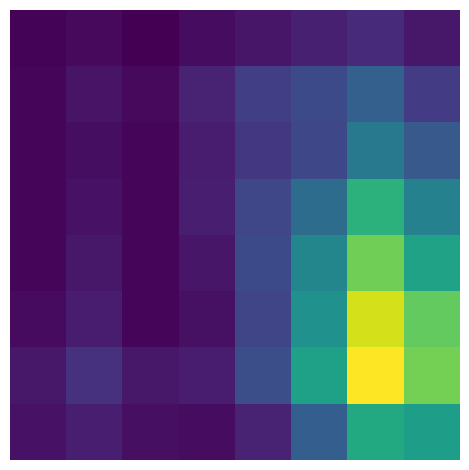

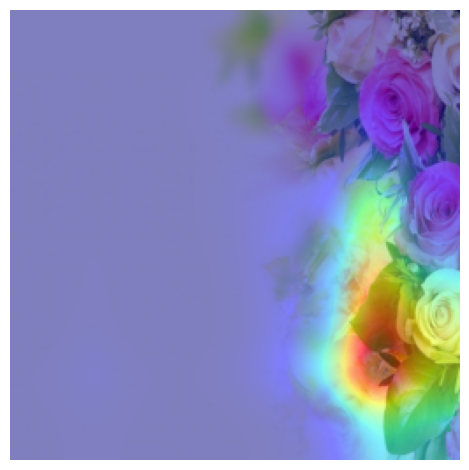

In [11]:
import torch
from torchvision import transforms
from PIL import Image
from torchvision.models import resnet18
from gradient import SmoothGradCAMpp
import matplotlib.pyplot as plt
from torchvision.transforms.functional import normalize, resize, to_pil_image
from utils import overlay_mask

# Define the path to your image file
image_path = "/home/mangesh_singh/Desktop/rl/trial_v1/RL_ENV/Neural-SLAM/Mangesh_trials/flower.jpg"

# Read the image as a PIL Image
img = Image.open(image_path)

transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256
    transforms.ToTensor(),           # Convert the PIL image to a PyTorch tensor
])

model = resnet18(pretrained=True).eval()

# Apply the transformations to the image
input_tensor = transform(img)

#input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
cam_extractor = SmoothGradCAMpp(model)

# Preprocess your data and feed it to the model
out = model(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

mask = plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(input_tensor), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()